<a href="https://colab.research.google.com/github/sigvehaug/ISDAwPython_day3.1/blob/main/ISDAwPython_3_1_NB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ISDAwPython-3.1-NB-1, Statistics with Python, S. Haug, University of Bern. 


# Statistics with Python

In this notebook we refresh some basic statistics and practice how to use Python to get them.

## Warm up and discussion (homework)


Let's look at over- and underbinning of histograms. So first take a look at the documentation page of the Scipy.stats module for the normal distribution: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

and use the norm.rvs() function to generate 5000 random values from the normal distribution.

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
# Generate 5000 random values
# Plot the generated data as histograms with different binnings


How do you decide on which binning to use?


*   Not smaller bins as the accuracy of your data
*   Or let Python decide
*   Plot with correct uncertainty bars (the best) 



# 1. Descriptive Statistics

We divide the statistics field into descriptive and inferential statistics. With descriptive statistics we describe our data. With inferential statistics we draw conclutions from the data. At the heart of statistics there are random variables and probability density/mass functions.

## 1.0 Random variables and probability density functions (pdf)

In practice the measurement process, the data taking, is a **random, or stochastic, process**. The outcome varies from measurement to measurement. There are three (at least) reasons:

- Measurements are normally on a sample, not the full population. Samples fluctuate.
- Sensors have limited resolution, measurements on the same sample vary within the resolution 
- According to quantum mechanics, i.e. at smallest distances, measurements are by nature stochastic

Our Iris dataset is a sample from 50 flowers in each class. So in each class there are 50 varying measurements for each of the four observables, sepal and petal length and width. This is due to the first and maybe the second reason (quantum mechanics can be neclected at scales larger than molecules). In descriptive statistics the observables are therefore called **random** variables. Let us call one x for examplification.

If x can take on any value from a continuous range, we write $f(x;\theta)dx$ as the probability that the measurement’s outcome lies between x and $x + dx$. The function $f (x; \theta)$ is called the **probability density function (p.d.f.)**, which may depend on one or more parameters $\theta$ (for example the Iris class).

A random variable can be discrete or continuous. If discrete, then we use $f(x;\theta)$ to denote the probability to find the value x (in python the term probability mass fundtion, pmf, is then used). In the following the term p.d.f. is often taken to cover both the continuous and discrete cases, although technically the term density should only be used in the continuous case.

The p.d.f. is always normalized to **unity** (the number 1), i.e. the integral, i.e. the surface under the curve equals one. Both x and $\theta$ may have multiple components and are then often written as vectors. If $\theta$ is unknown, we may wish to estimate its value from a given set of measurements of x; this is a central topic of statistics (see next notebook on parameter estimation and regression).

The p.d.f. should be chosen to describe the fluctuation of the random variable in a best possible way. In other words, we should always choose an approprate p.d.f to describe our data. The most used p.d.f. is the normal distribution. Examples of other pdfs can be found in the appendix.

## 1.1 The normal pdf

The normal (or Gaussian) probability density function is probably the most used one (informally the "bell curve"). It 
derives its importance in large part from the *central limit theorem*: "In most situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed." https://en.wikipedia.org/wiki/Central_limit_theorem 

**Example:** If one flips a coin many times the probability of getting a given number of heads in a series of flips will approach a normal curve, with mean equal to half the total number of flips in each series. (In the limit of an infinite number of flips, it will equal a normal curve.)

This means that in many or most cases it is sufficient to know the characteristics of the normal p.d.f. Others can be looked up if needed. Also often unspecified statements like the *error*, or better, the *uncertainty* refer to their meaning on the normal p.d.f.

As a formula the normal distribution function looks like (in one dimension)

$$ f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp(\frac{-(x-\mu)^2}{2\sigma^2}) $$

It reads, given the distribution parameters mean $\mu$ and standard deviation $\sigma$, x follows this function.

### Example 1.1 Plot the normal p.d.f

Plot the normal distribution with mean 0 and standard deviation 5 for 400 x values between -20 to 20. Repeat this for two other means and standard deviations. How big is the surface under the curves ?

(See also scipy.stat.norm https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html)  


In [3]:
import numpy as np


The normal pdf is only one of many built in pdfs and pmfs in Python (https://docs.scipy.org/doc/scipy/reference/stats.html). 

## 1.3 The PDF of your data - histogram

Histograms can be used as approximate pdfs of the data. Let's look at the histograms of the Iris data.


In [4]:
# Load the Iris dataset into a dataframe an study the dataframe content
# If you are not used to the Iris plant, look up on Wikipedia.
import pandas as pd
url = 'https://www.openml.org/data/get_csv/61/dataset_61_iris.arff'



It is hard to see by eye if these data are normally distributed. There are statistical tests checking this better. More on that later.

## 1.4 p-Value, Significance and Confidence Level

The p-value of a (measured) value is the surface (integral) under the pdf above that value, i.e. the probability of getting such a value or higher. Thus, the p-value is a measure for significance. Most implementations of statistical tests return the p-value and the value of the test statistic.

In [5]:
# For pdfs in scipy.stats, we can calculate p-values with cumulated pdf (cdf) 
# The p-value of 3 on a normal pdf with mean of 2 and SD of 5


In [6]:
# On our data set we can calculate the p-value manually
# The p-value of measuring a setosa slength longer than 5.2


What is significant for you ?

## 1.5 Mean, variance, standard deviation, skew, kurtosis

The $n^{th}$ moment of a random variable x with p.d.f. $f(x)$ is
$$ \alpha_n \equiv E[x^n] = \int_{-\infty}^{\infty} x^nf(x)dx   $$
In the discrete case for $n=1$ this integral becomes the sum known as the arithemtic mean:
$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i$$

<!--
and the $n^{th}$ central moment of x (or moment about the mean, $α_1$) is

$$ m_n \equiv E[(x-\alpha_1)^n] = \int_{-\infty}^{\infty} (x-\alpha_1)^nf(x)dx   $$
-->

The most commonly used moments are the **mean $\mu$ (or expectation value) and variance $\sigma^2$**:

$$\mu \equiv \alpha_1 $$
$$\sigma^2 \equiv V[x] \equiv \int_{-\infty}^{\infty} (x-\mu)^2 f(x)dx = ... = \alpha_2 - \mu^2 $$

The mean is the location or the “center of mass” of the p.d.f., and the variance is a measure of the square of its width. It is often convenient to use the **standard deviation (SD)** of $x$, $\sigma$, defined as the square root of the variance. In the discrete case the variance becomes
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$

For the normal p.d.f the standard deviation is its width. 

Based on higher moments other distribution descriptors are formed. **Skewness** and **Kurtosis** you may encounter. The skewness is a number indicating the deviation from a symmetric form. Kurtosis is a number indicating if the tails of the distribution is larger or smaller then the tails of the normal distribution.


In [7]:
# Get the descriptive statistics from a pdf in scipy.stats


In [8]:
# Print the summary statistics estimated from the setosa sample


Always remember this plot:

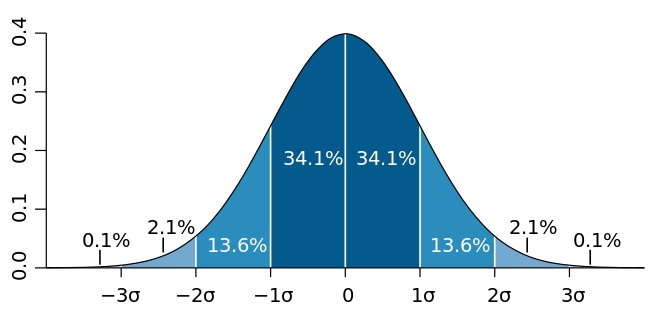

## 1.6 Standard Error of the Mean (SEM)

The standard error or standard error of the mean is defined:
$$SE = \frac{\sigma}{\sqrt{n}}$$
where $\sigma$ is the standard deviation of the population and $n$ is the sample size. If you report SE and not SD, be sure you know the difference and be clear on what you report. 

In [9]:
# Get the SEM estimates of the setosa sample


## 1.7 Quantiles, median and mode

The **quantile $x_{\alpha}$** is the value of the random variable x at which $\alpha$% of the area is below x. An important special case is the **median, $x_{med} \equiv x_{50}$**. At the median half the area lies above and half lies below. 
For the normal p.d.f. the median equals the mean. The most probable value of a distribution is called **mode**. 

Special quantiles are the quartiles and percentiles. The first quartile is the $x_{25}$, the second the $x_{50}$ etc. Percentiles are for example $x_{13}$ etc. 

<!--
Any odd moment about the mean is a measure of the **skewness** of the p.d.f. The simplest of these is the dimensionless coefficient of skewness $\gamma_1 = m_33/\sigma^3$.

The fourth central moment $m_4$ provides a convenient measure of the tails of a distribution. For the Gaussian distribution, one has $m_4 = 3\sigma^4$. The **kurtosis** is defined as $\gamma_2 = m_4/\sigma^4 − 3$, i.e., it is zero for a Gaussian, positive for a leptokurtic distribution with longer tails, and negative for a platykurtic distribution with tails that die off more quickly than those of a Gaussian.

The **quantile $x_{\alpha}$** is the value of the random variable x at which the cumulative distribution is equal to $\alpha$. That is, the quantile is the inverse of the cumulative distribution function, i.e., $x_{alpha} = F^{−1}(\alpha)$. An important special case is the **median, $x_{med}$**, defined by $F(x_{med}) = 1/2$, i.e., half the probability lies above and half lies below $x_{med}$. (More rigorously, $x_{med}$ is a median if $P(x \geq x_{med}) \geq 1/2$ and $P(x \leq x_{med}) \geq 1/2$. If only one value exists, it is called ‘the median.’)

Under a monotonic change of variable $x \rightarrow y(x)$, the quantiles of a distribution (and hence also the median) obey $y_{\alpha} = y(x_{\alpha})$. In general the expectation value and **mode** (most probable value) of a distribution do not, however, transform in this way.

Let us look at median and quantile$_68$ of the normal pdf: 
-->

In [10]:
# Let's calculate some quantiles


## 1.8 Box and scatter plots

Often box plots are used to visually inspect differences between categories. Let's display the setal length of the three Iris categories with bx plots (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html):

In [11]:
# Plot the boxplots for the sepal lenght for the 3 Iris species


A visual inspection of correlations between columns is often useful. Scatter plots provide this.

In [12]:
# Plot all scatter plots for the setosa species
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html
from pandas.plotting import scatter_matrix


## 1.9 Uncertainties

All data have uncertainties. These should always be communicated when showing scientific numbers or plots. We distinguish between two types.

- Statistical uncertainties 
    - Fluctuations, can be made smaller by taking more data, i.e. get more statistics (see definition of standard error)
- Systematic uncertainties 
    - Shift of data in one direction due to some "mistake" in the measurement, e.g. wrongly calibrated instrument showing all measured values systematically higher as they really are. Or for instance uncertainty due to the choice of methods and tools
    
The statistics tools can mostly handle the statistical uncertainties. There is no mathematical recipe for dealing with systematical uncertainties. You have to think through your experiment and try to estimate the influence of everything that can go wrong.

When uncertainties are stated on numbers or in graphs as error bars or error bands they generally show one standard deviation. If the data are well described by a normal p.d.f, the interpretation of one standard deviation is clear: if the measurement is repeated many times, 32% (or about 1/3 of the measurements) **should** be outside the error bars. 


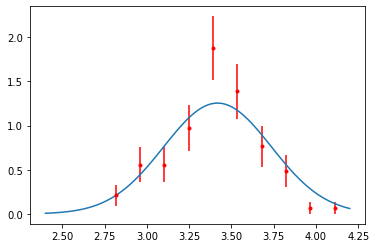

In [ ]:
# If we have time, we study this code which illustrates the above statement
import scipy
n = scipy.stats.norm.rvs(3.418,0.318,100)
# Draw a histogram which is not normalised
entries1, edges, patches = plt.hist(n, bins=10, histtype='step')
# Draw a histogram which IS normed
entries2, edges, patches = plt.hist(n, bins=10, histtype='step',density=True)
# Close plt so that the previous histograms are not shown
plt.close() 
# Calculate the poisson standard deviation and scale down to second histogram
errors = np.sqrt(entries1) * entries2/entries1
# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])
# draw errobars, use the sqrt error.
plt.errorbar(bin_centers, entries2, yerr=errors, fmt='r.')
# Draw a normal distribution
x = np.linspace(2.4,4.2,100)
plt.plot(x,scipy.stats.norm.pdf(x,3.418,0.318))
plt.show()

## 1.10 Recapitulation

- Collected data almost always contain random variables. Why?
- Random variables can be modelled with pdfs. The scipy.stats has many built in pdfs.
- There are many pdfs (infinite). We know the most important PDF
- We know the p-values for different 1, 2 and 3 standard deviations on the normal PDF.
- We know how to print descriptive stats of a dataset and plot histograms and scatter plots (correlations)


## 1.11 Exercise

Now use the Iris virginica class.

- Print the descriptive statistics
- Plot the histograms and scatterplots


## Annex 1 The Poisson pdf

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. For example:

- The number of meteorites greater than 1 meter diameter that strike Earth in a year
- The number of patients arriving in an emergency room between 10 and 11 pm

The probability mass function is $$f(k;\lambda) = \frac{\lambda^k exp(-\lambda)}{k!}$$
For large k the normal distribution is an excellent approximation of the poisson p.d.f. For k below 20 one should be careful using statements based on the normal distribution.

The standard deviation of the Poisson pdf is simply $\sqrt{\lambda}$. This is very convenient, in particular for higher $\lambda$ where the normal pdf is a good approximation and the probabilistic interpretation is easy (see below).

**Plot the Poisson**

In [ ]:
x = np.arange(-1, 40)
plt.plot(x,scipy.stats.poisson.pmf(x,2),drawstyle='steps-mid')
plt.plot(x,scipy.stats.poisson.pmf(x,15),drawstyle='steps-mid')

## Annex 2 The Binomial PDF

The binomial pdf models the probability of getting k positives when drawing n times, each time asking positive or false. For example,   

$$f(k;n,p) = \binom{n}{k} \cdot p^kq^{n-k}$$

The binomial distribution converges towards the Poisson distribution as the number of trials goes to infinity while the product np remains fixed or at least p tends to zero. Therefore, the Poisson distribution with parameter λ = np can be used as an approximation to B(n, p) of the binomial distribution if n is sufficiently large and p is sufficiently small. According to two rules of thumb, this approximation is good if n ≥ 20 and p ≤ 0.05, or if n ≥ 100 and np ≤ 10.

For n>20 and p not too close to 1 or 0, the normal distribution is also here a good approximation. 

**Plot the binomial pdf for various parameters**

## Annex 3 Probability

An abstract definition of probability can be given by considering a set $S$, called the sample space, and possible subsets $A,B,...$ the interpretation of which is left open. The probability $P$ is a real-valued function defined by the following axioms due to Kolmogorov (1933) [9]:

- For every subset $A$ in $S$, $P(A) ≥ 0$;
- For disjoint subsets (i.e., $A ∩ B = ∅$), $P(A ∪ B) = P(A) + P(B)$; 
- $P(S)=1$.

From this further properties can be derives, e.g.

- $P(\bar{A}) = 1 - P(A)$
- $P(A \cup \bar{A}) = 1$
- $P(\emptyset) = 0$
- if A in B, then $P(A)\leq P(B)$
- $P(A \cup \bar{A}) = P(A) + P(B) - P(A\cap B)$

#### Conditional probability
In addition, one defines the conditional probability $P(A|B)$ (read as $P$ of $A$ given $B$) as $$P(A|B) = \frac{P(A ∩ B)}{P(B)}$$

As an example, when throwing the dice, consider obtaining more than 3 eyes given only trows with even number of eyes outcomes. We calculate the (conditional) probability:

$$P(n>3|n\; even) = \frac{P(n>3 \cap n\; even)}{P(even)} = \frac{2/6}{3/6} = \frac{2}{3}$$

#### Independence

If A and B are independent, then 

$$P(A|B) = \frac{P(A ∩ B)}{P(B)} = \frac{P(A)P(B)}{P(B)} = P(A)$$


### Some words on probability and bayesian versus frequentist statistics

Since data taking is data taking of random variables, we need to define and talk about probability. In mathematichs probability is defined in a rather abstract manner (see Annex below). For our purposes we go directly to the interpreation as either **relative frequency** or **subjective probability**. If A is a possible outcome of an experiment repeated n times, then the probability of A is the realtive frequency

$$P(A) = \lim_{n\rightarrow \infty} \frac{times \; outcome \;is\;A}{n}$$

The subjective probability is

$$ P(A) = degree\;of\;belief\;that \;A \; is\; true$$

Both concepts are consistent with the abstract mathematical definition .

#### Bayes' theorem

From this definition and using the fact that $A ∩ B$ and $B ∩ A$ (intersection) are the same, one obtains
Bayes’ theorem

$$P (A|B) = \frac{P(B|A)P(A)}{P(B)}$$

first published by the Reverend Thomas Bayes (1702-1761). Statistics based on the relative frequency interpretation of probability is called frequentist statistics, on bayesian theorem bayesian statistics.